In [1]:
#Task 1
!pip install geopandas
import geopandas as gpd

In [2]:
Cal_house_shp = gpd.read_file("Downloads/data 4/california_housing.shp")

In [3]:
Cal_house_shp.head(10)

,total_room,total_bedr,population,households,median_inc,ocean_prox,house_age,median_val,geometry
0,880.0,129.0,322.0,126.0,83252.0,NEAR BAY,41.0,452600.0,POINT (-122.23000 37.88000)
1,7099.0,1106.0,2401.0,1138.0,83014.0,NEAR BAY,21.0,358500.0,POINT (-122.22000 37.86000)
2,1467.0,190.0,496.0,177.0,72574.0,NEAR BAY,52.0,352100.0,POINT (-122.24000 37.85000)
3,1274.0,235.0,558.0,219.0,56431.0,NEAR BAY,52.0,341300.0,POINT (-122.25000 37.85000)
4,1627.0,280.0,565.0,259.0,38462.0,NEAR BAY,52.0,342200.0,POINT (-122.25000 37.85000)
5,919.0,213.0,413.0,193.0,40368.0,NEAR BAY,52.0,269700.0,POINT (-122.25000 37.85000)
6,2535.0,489.0,1094.0,514.0,36591.0,NEAR BAY,52.0,299200.0,POINT (-122.25000 37.84000)
7,3104.0,687.0,1157.0,647.0,31200.0,NEAR BAY,52.0,241400.0,POINT (-122.25000 37.84000)
8,2555.0,665.0,1206.0,595.0,20804.0,NEAR BAY,42.0,226700.0,POINT (-122.26000 37.84000)
9,3549.0,707.0,1551.0,714.0,36912.0,NEAR BAY,52.0,261100.0,POINT (-122.25000 37.84000)


In [4]:
Cal_house_shp["x"] = Cal_house_shp["geometry"].x
Cal_house_shp["y"] = Cal_house_shp["geometry"].y
Cal_house_shp.head()

,total_room,total_bedr,population,households,median_inc,ocean_prox,house_age,median_val,geometry,x,y
0,880.0,129.0,322.0,126.0,83252.0,NEAR BAY,41.0,452600.0,POINT (-122.23000 37.88000),-122.23,37.88
1,7099.0,1106.0,2401.0,1138.0,83014.0,NEAR BAY,21.0,358500.0,POINT (-122.22000 37.86000),-122.22,37.86
2,1467.0,190.0,496.0,177.0,72574.0,NEAR BAY,52.0,352100.0,POINT (-122.24000 37.85000),-122.24,37.85
3,1274.0,235.0,558.0,219.0,56431.0,NEAR BAY,52.0,341300.0,POINT (-122.25000 37.85000),-122.25,37.85
4,1627.0,280.0,565.0,259.0,38462.0,NEAR BAY,52.0,342200.0,POINT (-122.25000 37.85000),-122.25,37.85


In [8]:
!pip install folium
import folium as fol
from folium import Marker

In [42]:
Cal_500 = Cal_house_shp.head(500)

In [13]:
m_1 = fol.Map(location=[37.88,-122.23], tiles="openstreetmap", zoom_start=10)
for idx, row in Cal_500.iterrows():
    Marker([row['y'], row['x']]).add_to(m_1)
m_1

array([[<AxesSubplot:title={'center':'total_room'}>,
        <AxesSubplot:title={'center':'total_bedr'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_inc'}>,
        <AxesSubplot:title={'center':'house_age'}>],
       [<AxesSubplot:title={'center':'median_val'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

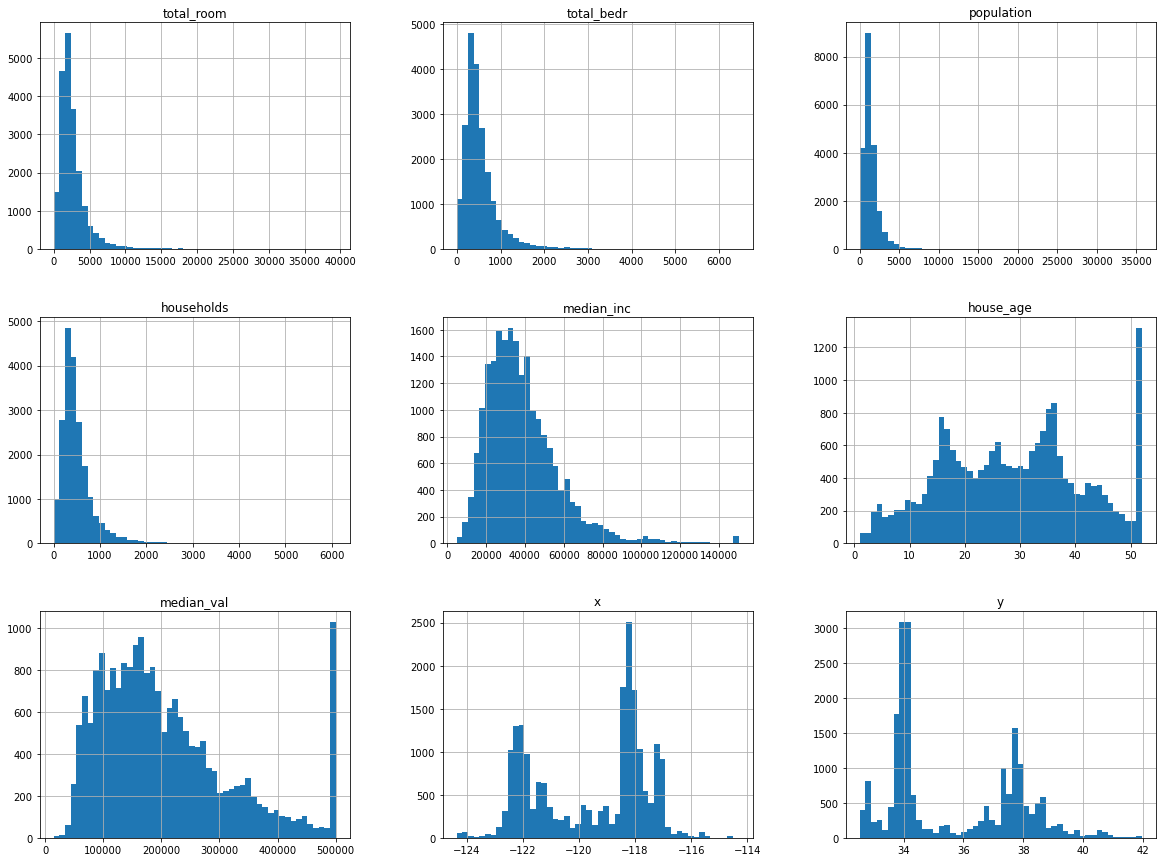

In [14]:
#Task 2(1)
Cal_house_shp.hist(bins=50, figsize=(20,15))

In [15]:
house_clean = Cal_house_shp[Cal_house_shp["house_age"]<52]

In [16]:
house_clean = house_clean[house_clean["median_val"]<500001]

In [17]:
#Task 2(2)
house_clean['ocean_prox'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [21]:
import pandas as pd
house_clean = pd.get_dummies(house_clean)

In [24]:
#Task 3
training_data = house_clean.sample(frac=0.8, random_state=42)
test_data = house_clean.drop(training_data.index)
training_data.head()

,total_room,total_bedr,population,households,median_inc,house_age,median_val,geometry,x,y,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
12869,4842.0,935.0,2857.0,907.0,39318.0,7.0,133000.0,POINT (-121.38000 38.71000),-121.38,38.71,0,1,0,0,0
8961,593.0,137.0,371.0,132.0,46932.0,40.0,332800.0,POINT (-118.40000 34.02000),-118.40,34.02,1,0,0,0,0
20309,1612.0,334.0,1431.0,335.0,48125.0,22.0,194400.0,POINT (-119.15000 34.17000),-119.15,34.17,0,0,0,0,1
17392,2121.0,445.0,2211.0,463.0,40603.0,21.0,117600.0,POINT (-120.45000 34.96000),-120.45,34.96,1,0,0,0,0
6961,3531.0,754.0,1613.0,697.0,32359.0,36.0,198600.0,POINT (-118.04000 33.99000),-118.04,33.99,1,0,0,0,0


In [25]:
training_X = training_data[["total_room","total_bedr","population","households","median_inc","house_age","median_val","x","y","ocean_prox_<1H OCEAN","ocean_prox_INLAND","ocean_prox_ISLAND","ocean_prox_NEAR BAY","ocean_prox_NEAR OCEAN" ]]
training_Y = training_data["median_val"]

In [26]:
training_X.head()

,total_room,total_bedr,population,households,median_inc,house_age,median_val,x,y,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
12869,4842.0,935.0,2857.0,907.0,39318.0,7.0,133000.0,-121.38,38.71,0,1,0,0,0
8961,593.0,137.0,371.0,132.0,46932.0,40.0,332800.0,-118.40,34.02,1,0,0,0,0
20309,1612.0,334.0,1431.0,335.0,48125.0,22.0,194400.0,-119.15,34.17,0,0,0,0,1
17392,2121.0,445.0,2211.0,463.0,40603.0,21.0,117600.0,-120.45,34.96,1,0,0,0,0
6961,3531.0,754.0,1613.0,697.0,32359.0,36.0,198600.0,-118.04,33.99,1,0,0,0,0


In [27]:
test_X = test_data[["total_room","total_bedr","population","households","median_inc","house_age","median_val","x","y","ocean_prox_<1H OCEAN","ocean_prox_INLAND","ocean_prox_ISLAND","ocean_prox_NEAR BAY","ocean_prox_NEAR OCEAN" ]]
test_Y = test_data["median_val"]

In [28]:
def standardize_data (data, stats):
  return (data - stats['mean'])/stats['std']

In [29]:
training_stats = training_X.describe().transpose()
training_stats

,count,mean,std,min,25%,50%,75%,max
total_room,14858.0,2668.450128,2253.243630,2.00,1444.00,2137.00,3192.75,39320.00
total_bedr,14858.0,541.619262,435.084160,0.00,294.00,436.00,656.00,6445.00
population,14858.0,1469.974896,1183.121367,3.00,805.25,1201.00,1777.00,35682.00
households,14858.0,508.484386,394.538475,2.00,282.00,415.00,615.00,6082.00
median_inc,14858.0,36912.562996,15674.248967,4999.00,25386.25,34643.00,46111.00,150001.00
house_age,14858.0,26.971934,11.469346,1.00,17.00,27.00,36.00,51.00
median_val,14858.0,189740.207094,95409.173251,14999.00,116200.00,171500.00,243000.00,500000.00
x,14858.0,-119.491446,1.984893,-124.30,-121.57,-118.46,-117.97,-114.31
y,14858.0,35.598615,2.151326,32.54,33.92,34.24,37.67,41.95
ocean_prox_<1H OCEAN,14858.0,0.446965,0.497196,0.00,0.00,0.00,1.00,1.00


In [30]:
training_X_std = standardize_data(training_X, training_stats)

In [31]:
test_X_std = standardize_data(test_X, training_stats)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
linear_model = LinearRegression()
linear_model.fit(training_X_std, training_Y)

LinearRegression()

In [34]:
test_y_pred = linear_model.predict(test_X_std)

In [35]:
test_y_pred[0]

159800.00000000003

In [36]:
test_Y[0:1]

21    159800.0
Name: median_val, dtype: float64

In [37]:
#Task 4
import matplotlib.pyplot as plt

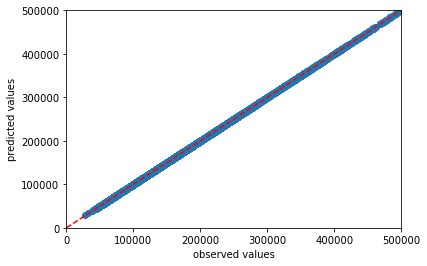

In [38]:
plt.scatter(test_Y, test_y_pred)
plt.xlabel("observed values")
plt.ylabel("predicted values")
plt.xlim([0,500000])
plt.ylim([0,500000])
plt.plot([0,500000], [0,500000], "r--")

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
rmse = mean_squared_error(test_Y, test_y_pred, squared=False)
rmse

1.652226084490253e-10